In [29]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [31]:
img_path = glob(
    r'D:\video_detection\file_detection\datasets\train\*\images\*.png')
mask_path = glob(
    r'D:\video_detection\file_detection\datasets\train\*\masks\*.png')

In [36]:
input_w = 256
input_h = 256
input_ch = 3

In [37]:
output_w = 256
output_h = 256
output_ch = 1

In [38]:
images = np.zeros((len(img_path), input_w, input_h, input_ch), dtype=np.uint8)

In [39]:
masks = np.zeros((len(img_path), input_w, input_h), dtype=np.uint8)

In [45]:
images.shape

(670, 256, 256, 3)

In [46]:
masks.shape

(670, 256, 256)

In [47]:
images = images / 255
masks = masks / 255

In [49]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Conv2DTranspose, Input, concatenate, UpSampling2D

In [50]:
input = Input(shape=(input_w, input_h, input_ch))

conv1_encoder = Conv2D(32, (3, 3), activation='relu',
                       padding='same', name='input_gray')(input)
conv1_encoder = Conv2D(32, (3, 3), activation='relu',
                       padding='same')(conv1_encoder)
pool1_encoder = MaxPool2D((2, 2))(conv1_encoder)


conv2_encoder = Conv2D(64, (3, 3), activation='relu',
                       padding='same')(pool1_encoder)
conv2_encoder = Conv2D(64, (3, 3), activation='relu',
                       padding='same')(conv2_encoder)
pool2_encoder = MaxPool2D((2, 2))(conv2_encoder)


conv3_encoder = Conv2D(128, (3, 3), activation='relu',
                       padding='same')(pool2_encoder)
conv3_encoder = Conv2D(128, (3, 3), activation='relu',
                       padding='same')(conv3_encoder)
pool3_encoder = MaxPool2D((2, 2))(conv3_encoder)


conv4_encoder = Conv2D(256, (3, 3), activation='relu',
                       padding='same')(pool3_encoder)
conv4_encoder = Conv2D(256, (3, 3), activation='relu',
                       padding='same')(conv4_encoder)


up1_decoder = Conv2DTranspose(128, (2, 2), strides=(
    2, 2), padding='same')(conv4_encoder)
concat1 = concatenate([conv3_encoder, up1_decoder])
conv1_decoder = Conv2D(128, (3, 3), activation='relu', padding='same')(concat1)
conv1_decoder = Conv2D(128, (3, 3), activation='relu',
                       padding='same')(conv1_decoder)


up2_decoder = Conv2DTranspose(64, (2, 2), strides=(
    2, 2), padding='same')(conv1_decoder)
concat2 = concatenate([conv2_encoder, up2_decoder])
conv2_decoder = Conv2D(64, (3, 3), activation='relu', padding='same')(concat2)
conv2_decoder = Conv2D(64, (3, 3), activation='relu',
                       padding='same')(conv2_decoder)


up3_decoder = Conv2DTranspose(32, (2, 2), strides=(
    2, 2), padding='same')(conv2_decoder)
concat3 = concatenate([conv1_encoder, up3_decoder])
conv3_decoder = Conv2D(32, (3, 3), activation='relu', padding='same')(concat3)
conv3_decoder = Conv2D(32, (3, 3), activation='relu',
                       padding='same')(conv3_decoder)


output = Conv2D(1, (1, 1), activation='sigmoid',
                name='output_color')(conv3_decoder)


model = Model(inputs=[input], outputs=[output])

In [51]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_gray (Conv2D) │ (None, 256, 256,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 256, 256,  │      9,248 │ input_gray[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 128, 128,  │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_14[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_15[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_16[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_18[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 64, 64,    │    131,200 │ conv2d_19[0][0]   │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 64, 64,    │          0 │ conv2d_17[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_transpose… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 64, 64,    │    295,040 │ concatenate_3[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_20[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 128, 128,  │     32,832 │ conv2d_21[0][0] 

 Total params: 1,925,601 (7.35 MB)

 Trainable params: 1,925,601 (7.35 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
opt = tf.keras.optimizers.Adam(0.001)
loss = tf.keras.losses.BinaryCrossentropy
model.compile(optimizer=opt, loss=loss)

In [53]:
model.fit(images, masks, validation_split=0.1,
          batch_size=50, epochs=20, verbose=2)

Epoch 1/20
13/13 - 185s - 14s/step - loss: 0.5350 - val_loss: 0.2882
Epoch 2/20
13/13 - 317s - 24s/step - loss: 0.3067 - val_loss: 0.6851
Epoch 3/20
13/13 - 277s - 21s/step - loss: 0.3039 - val_loss: 0.2989
Epoch 4/20
13/13 - 272s - 21s/step - loss: 0.2533 - val_loss: 0.2162
Epoch 5/20
13/13 - 110s - 8s/step - loss: 0.2228 - val_loss: 0.1848
Epoch 6/20
13/13 - 112s - 9s/step - loss: 0.1886 - val_loss: 0.1575
Epoch 7/20
13/13 - 281s - 22s/step - loss: 0.1605 - val_loss: 0.1450
Epoch 8/20
13/13 - 308s - 24s/step - loss: 0.1422 - val_loss: 0.1523
Epoch 9/20
13/13 - 289s - 22s/step - loss: 0.1254 - val_loss: 0.1410
Epoch 10/20
13/13 - 233s - 18s/step - loss: 0.1380 - val_loss: 0.1472
Epoch 11/20
13/13 - 112s - 9s/step - loss: 0.1134 - val_loss: 0.1115
Epoch 12/20
13/13 - 129s - 10s/step - loss: 0.0997 - val_loss: 0.1028
Epoch 13/20
13/13 - 228s - 18s/step - loss: 0.0968 - val_loss: 0.1072
Epoch 14/20
13/13 - 322s - 25s/step - loss: 0.0936 - val_loss: 0.0935
Epoch 15/20
13/13 - 322s - 25s/s

In [57]:
pred = model.predict(images[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


In [58]:
pred = (pred > 0.5).astype(int)

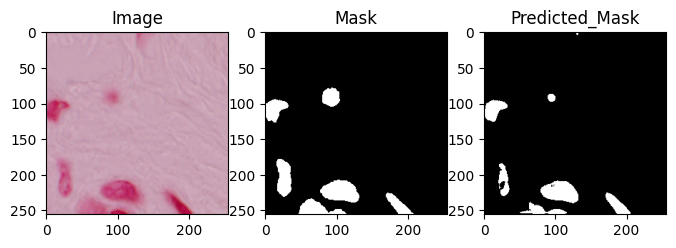

In [60]:
plt.figure(figsize=(8, 4))

index = 4

plt.subplot(1, 3, 1)
plt.imshow(images[index])
plt.title('Image')


plt.subplot(1, 3, 2)
plt.imshow(masks[index], cmap='gray')
plt.title('Mask')


plt.subplot(1, 3, 3)
plt.imshow(pred[index], cmap='gray')
plt.title('Predicted_Mask')


plt.show()

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def evaluate_model(y_true, y_pred):
    y_true_flatten = y_true.flatten()
    y_pred_flatten = y_pred.flatten()

    accuracy = accuracy_score(y_true_flatten, y_pred_flatten)

    precision = precision_score(y_true_flatten, y_pred_flatten)

    recall = recall_score(y_true_flatten, y_pred_flatten)

    f1 = f1_score(y_true_flatten, y_pred_flatten)

    cm = confusion_matrix(y_true_flatten, y_pred_flatten)

    return accuracy, precision, recall, f1, cm


pred = model.predict(images)

pred_binary = (pred > 0.5).astype(int)

accuracy, precision, recall, f1, cm = evaluate_model(masks, pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step
Accuracy: 0.9695
Precision: 0.9198
Recall: 0.8551
F1 Score: 0.8863
Confusion Matrix:
[[37341780   455526]
 [  885892  5225922]]
